In [ ]:
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier  # <-- Add this import
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import shap






In [ ]:
df = pd.read_csv('HR Data.xlsx - HR data.csv')

In [3]:
df.head(3)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
df.describe()

,Employee Number,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
-2                            0
0                             0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performa

In [8]:
df[df.duplicated()]

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager


In [9]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   int64 
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [11]:
df['Over Time'] = df['Over Time'].map({'Yes': 1, 'No': 0})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   int64 
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   int64 
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [22]:
df.corr()

,Attrition,Over Time,Monthly Income
Attrition,1.000000,0.787818,-0.976088
Over Time,0.787818,1.000000,-0.902864
Monthly Income,-0.976088,-0.902864,1.000000


In [11]:
features = ['Age', 'Over Time', 'Monthly Income', 'Years At Company']
target = 'Attrition'

X = df[features]
y = df[target]

# Encode 'OverTime' and 'Attrition' if they are Yes/No
le = LabelEncoder()
X.loc[:, 'Over Time'] = le.fit_transform(X['Over Time'])  

y = le.fit_transform(y)  # Yes -> 1, No -> 0

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       253
           1       1.00      0.07      0.14        41

    accuracy                           0.87       294
   macro avg       0.93      0.54      0.53       294
weighted avg       0.89      0.87      0.82       294



In [20]:
features = ['Age', 'Over Time', 'Monthly Income', 'Years At Company']
target = 'Attrition'

X = df[features]
y = df[target]

# Encode 'OverTime' and 'Attrition' if they are Yes/No
le = LabelEncoder()
X.loc[:, 'Over Time'] = le.fit_transform(X['Over Time'])  

y = le.fit_transform(y)  # Yes -> 1, No -> 0

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7925170068027211

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       253
           1       0.26      0.27      0.27        41

    accuracy                           0.79       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.79      0.79      0.79       294



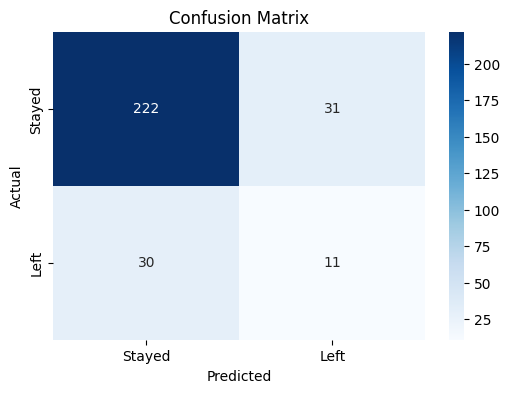

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()